# Bias-variance decomposition


A central result in 'classical' machine learning and statistics is known as the _bias-variance decomposition_. Let's flesh it out.

Consider the following regression problem in which we have $x\in\mathbb{R}^D$, $y\in\mathbb{R}$, and want to learn the conditional distribution $p(y\lvert x)$, or at least its mean $\mathbb{E}[y\lvert x]$, via some parametric function $f(x)$. Now, any finite training set of $N$ points drawn from $p$ will itself be a random variable:

$$
\mathcal{D}=\left\{\left(x^{(n)}, y^{(n)}\right) \big|\ (x, y) \sim p(x, y)\right\}_{n=1}^N.
$$

The bias-variance decomposition considers how the risk (expected loss under $p$ for a model $f$) depends on this random variable. Let's do the calculation first, then tease out the intuition.


The risk under the joint distribution $p(x,y)$ for a regression task using the square loss is given by

$$
\begin{aligned}
\mathbb{E}[\mathcal{L}]
  &\stackrel{\mathrm{(a)}}{=} \mathbb{E}_{xy}\mathbb{E}_{\mathcal{D}}\Big[\{y - f(x; \mathcal{D})\}^2\Big] \\
  &\stackrel{\mathrm{(b)}}{=} \mathbb{E}_{xy}\mathbb{E}_{\mathcal{D}}\Big[\{y - h(x) + h(x) - f(x; \mathcal{D})\}^2\Big] \\
  &\stackrel{\mathrm{(c)}}{=} \mathbb{E}_{xy}\Big[\{y - h(x)\}^2\Big]
     + \mathbb{E}_x\mathbb{E}_\mathcal{D}\Big[\{h(x) - f(x; \mathcal{D})\}^2\Big] \\
  &\stackrel{\mathrm{(d)}}{=} \mathbb{E}_{xy}\Big[\{y - h(x)\}^2\Big]
     + \mathbb{E}_x\mathbb{E}_\mathcal{D}\Big[
        \big\{h(x)
        - \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]
        + \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]
        -  f(x; \mathcal{D})\big\}^2
      \Big] \\
  &\stackrel{\mathrm{(e)}}{=} \mathbb{E}_{xy}\Big[\{y - h(x)\}^2\Big]
     + \mathbb{E}_x\Big[\big\{h(x) - \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]\big\}^2\Big]
     + \mathbb{E}_x\mathbb{E}_\mathcal{D}\Big[\big\{f(x; \mathcal{D}) - \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]\big\}^2\Big] \\
  &\stackrel{\mathrm{(f)}}{=} \underbrace{\int\int\{y - h(x)\}^2p(x,y)\mathrm{d}x\mathrm{d}y}_{\mathrm{noise}}
     + \underbrace{\int\{h(x) - \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]\big\}^2p(x)\mathrm{d}x}_{\mathrm{bias}^2}
     + \underbrace{\int\mathbb{E}_\mathcal{D}\Big[\big\{f(x; \mathcal{D}) - \mathbb{E}_\mathcal{D}[f(x;\mathcal{D})]\big\}^2\Big]p(x)\mathrm{d}x}_{\mathrm{variance}},
\end{aligned}
$$

reasoning:
* $\mathrm{(a)}$ expresses the fact that $f$ is a function of both its inputs $x$ and the dataset $\mathcal{D}$ it is trained on, which is a random variable.
* $\mathrm{(b)}$ uses the additive identity; here $h(x):=\mathbb{E}_y[y\lvert x]$ is the optimal hypothesis under the square loss,
* $\mathrm{(c)}$ follows by noting that the cross-term vanishes since $\mathbb{E}_{xy}[y-h(x)] = 0$,
* $\mathrm{(d)}$ and $\mathrm{(e)}$ follow by again using the additive identity and noting that the cross-term is zero, and
* $\mathrm{(f)}$ spells out the expectations in terms of the underlying marginals.

This decomposition tells us a few things:

- In all but the deterministic case, all expectation models will unsurprisingly incur non-zero risk from irreducible noise in the data.
- Models that don't have sufficient capacity/flexibility or that are poorly specified will incur non-zero risk in expectation due to bias ('underfitting') resulting from being unable to closely match $h(x)$.
- Models that 'overfit' to their datasets $\mathcal{D}$ will have high variance over all $\mathcal{D}$; this also contributes to the true risk.

## Simple demonstration

Let's make something like Figure 3.5 of Bishop. We draw our data from $p(x,y)$ defined by:

$$
p(x) = \mathcal{U}\left(-\frac{\pi}{2}, \frac{\pi}{2}\right) \\
p(y\lvert x) = \mathcal{N}\left(\sin(x), \sigma^2\right)
$$



## Homework

Homework tasks are as follows and you should submit a report with appropriate screen captures to show you have done them:
*   Read this file in Goolge Colab and run.
*   Test with at least five different $p(x)$.
*   Create a validation and a test set. For creating the validation and test sets, you can use the same $p(x)$ and $p(y|x)$ models but sample independently from the train set. So, train with the train set, choose the best model with the validatation set, and test with the test set. You should prepare the validation and test sets in the "Create the dataset" section. One more thing is that you do not need to subsample the train set, i.e., num_models = 1 and use the entire train set in the following code.
*   Repeat the above with at least five different various train/validation/test set sizes (or ratios). For reproducibility, you have to set a fixed random seed number so that everytime you see the same result for a given train/validation/test size options.
*   Write your final undersanding with one passage about the regularization, validation, bias-variance decomposition.
*   Answer the following questions in your report. In particular, there are no true answers for the second question: i) What does hyparameter means? ii) How can we conduct the bias-variance tradeoff for CharGPT?

In [ ]:
# @title Imports

import numpy as np
import pandas as pd
import plotnine as gg
import sklearn

gg.theme_set(gg.theme_bw());

In [ ]:
# @title Create the dataset
# generate random gaussian


num_data = 100
noise_sigma = 0.2
def generate_data(num_data,noise_sigma):
  xs=np.random.poisson(np.pi,size=num_data)
  ys = np.sin(xs) + noise_sigma * np.random.randn(num_data)
  return xs,ys

train_xs,train_ys= generate_data(num_data,noise_sigma)
val_xs,val_ys= generate_data(num_data,noise_sigma)
test_xs,test_ys= generate_data(num_data,noise_sigma)



# # train_xs = np.random.uniform(np.pi, 2*np.pi, size=num_data)
# # train_xs=np.random.normal(np.pi,np.pi/6,size=num_data)
# train_xs=np.random.poisson(np.pi,size=num_data)
# train_ys = np.sin(train_xs) + noise_sigma * np.random.randn(num_data)

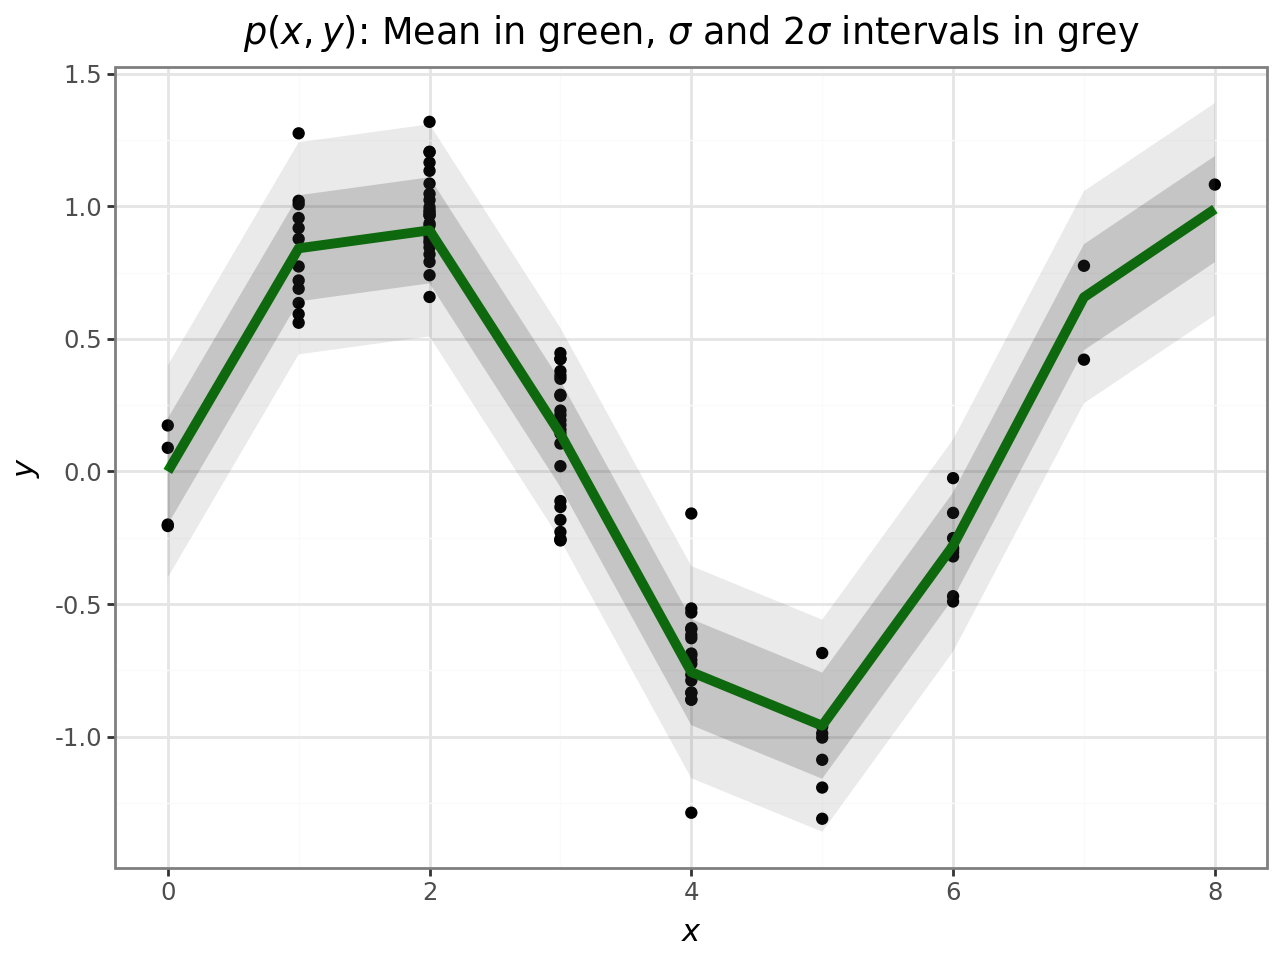

In [ ]:
# @title Plot the data and its underlying distribution.

df_train = pd.DataFrame({'x': train_xs,
                   'y': train_ys,
                   'h': np.sin(train_xs),
                   'std': noise_sigma,
                   })
df_val = pd.DataFrame({'x': val_xs,
                   'y': val_ys,
                   'h': np.sin(val_xs),
                   'std': noise_sigma,
                   })
df_test = pd.DataFrame({'x': test_xs,
                   'y': test_ys,
                   'h': np.sin(test_xs),
                   'std': noise_sigma,
                   })


p = (gg.ggplot(df_train)
     + gg.aes(x='x', y='h')
     + gg.geom_point(gg.aes(y='y'))
     + gg.geom_line(color='green', size=2)
     + gg.geom_ribbon(gg.aes(ymin='h - std', ymax='h + std'), alpha=0.2)
     + gg.geom_ribbon(gg.aes(ymin='h - 2 * std', ymax='h + 2 * std'), alpha=0.1)
     + gg.ggtitle(r'$p(x, y)$: Mean in green, $\sigma$ '
                  'and 2$\sigma$ intervals in grey')
     + gg.xlab(r'$x$')
     + gg.ylab(r'$y$')
)
p

Let's let fit a linear model

$$f(x;\theta)=\theta^T\phi(x)$$

where $\theta\in\mathbb{R}^M$ are model weights and $\phi: \mathbb{R}\to\mathbb{R}^M$ are features. Some example features:

- Polynomial:
  $$\phi_P^m(x) = x^m$$
- Fourier:
  $$\phi_F^m(x) = \sin\left(\frac{2\pi m x}{M}\right)$$
- Gaussian: $$\phi_G^m(x) = \exp\left(-\left[x + \frac{M\pi - 2\pi m}{M}\right]^2\right)$$

We'll minimize the $l_2$-regularized empirical risk

$$
\hat{\mathcal{L}}= + \lambda\big\|\theta\big\|^2_2 + \sum_{n=1}^N \left(y^{(i)} - f\left(x^{(i)};\theta\right)\right)^2.
$$

In [ ]:
# Number of training points, number of datasets to sample, number of features to use.
num_train = 25
num_models = 20
num_features = 24

# Define the features.
polynomial_features = np.array([train_xs**n for n in range(num_features)]).T
fourier_features = np.array([np.sin(2*np.pi*n*train_xs / num_features) for n in range(num_features)]).T
gaussian_features = np.array([np.exp(-(train_xs - (2*np.pi*x/num_features - np.pi))**2) for x in range(num_features)]).T

# Train for different amounts of regularization.
features = gaussian_features
results_df = pd.DataFrame()
for lam in [1e-3, 1e-1, 1e0, 1e1]:
  for idx in range(num_models):
    # Sample a small subset of the dataset.
    train_idx = np.random.randint(len(features), size=num_train)
    train_features = features[train_idx]
    train_targets = train_ys[train_idx]

    # Fit a model to it.
    model = sklearn.linear_model.Ridge(alpha=lam)
    model.fit(train_features, train_targets)

    # Collect results.
    df = pd.DataFrame({
        'x': train_xs,
        'y': train_ys,
        'h': np.sin(train_xs),
        'f': model.predict(features),
        'idx': [idx] * num_data,
        'lam': lam,
    })
    results_df = pd.concat([results_df, df])
# print(polynomial_features)
# print(fourier_features)
# print(gaussian_features)

In [ ]:
df.head()

x         y         h         f  idx   lam
0  1.339384  1.155295  0.973343  0.257736    1  10.0
1 -0.933438 -1.114001 -0.803670  0.169115    1  10.0
2  1.584294  1.282487  0.999909  0.261344    1  10.0
3  1.674370  1.279826  0.994641  0.260920    1  10.0
4  1.917140  0.899539  0.940620  0.255445    1  10.0

In [ ]:
results_df.head()

x         y         h         f  idx    lam
0  1.339384  1.155295  0.973343  0.849870    0  0.001
1 -0.933438 -1.114001 -0.803670 -0.877880    0  0.001
2  1.584294  1.282487  0.999909  0.906627    0  0.001
3  1.674370  1.279826  0.994641  0.890816    0  0.001
4  1.917140  0.899539  0.940620  0.755705    0  0.001

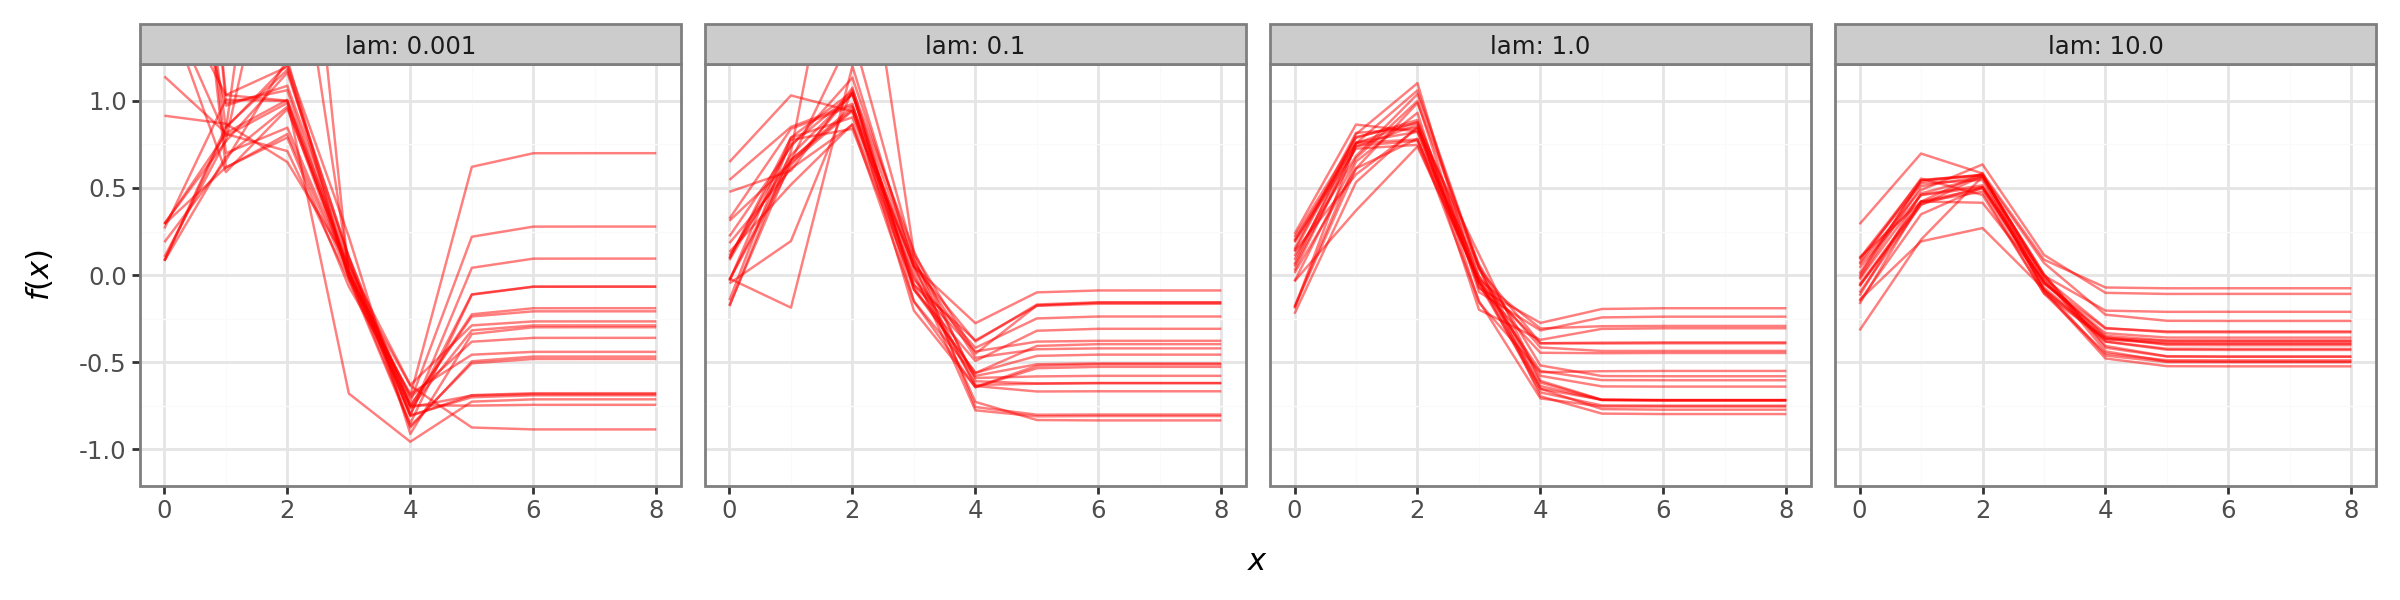

In [ ]:
# Plot our fitted functions.
fit_plot = (gg.ggplot(results_df)
            + gg.aes(x='x')

            + gg.geom_line(gg.aes(y='f', group='idx'), color='red', alpha=0.5)
            + gg.facet_wrap('lam', labeller='label_both', ncol=4)
            + gg.coord_cartesian(ylim=[-1.1, 1.1])
            + gg.theme(figure_size=(12, 3))
            + gg.xlab(r'$x$')
            + gg.ylab(r'$f(x)$')
)
fit_plot

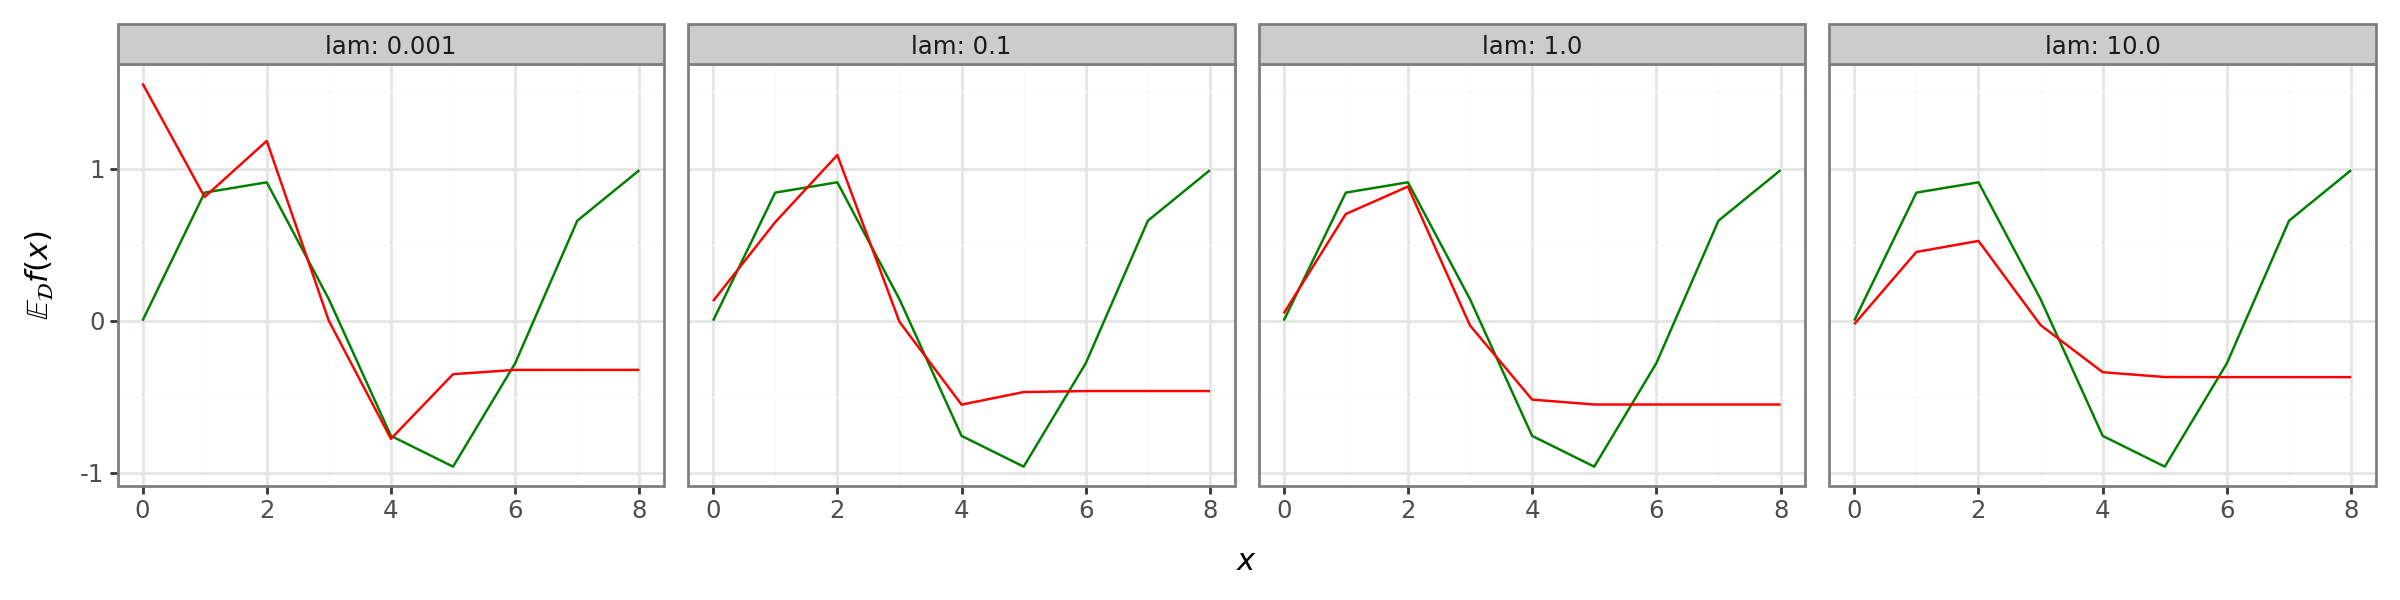

In [ ]:
# Plot their mean, over the datasets D.
mean_df = results_df.groupby(['x', 'lam', 'y', 'h']).agg({'f': "mean"}).reset_index()

mean_plot = (gg.ggplot(mean_df)
             + gg.aes(x='x', y='f')
             + gg.geom_line(gg.aes(y='h'), color='green')
             + gg.geom_line(color='red')
             + gg.facet_wrap('lam', labeller='label_both', ncol=4)
             + gg.theme(figure_size=(12, 3))
             + gg.xlab(r'$x$')
             + gg.ylab(r'$\mathbb{E}_\mathcal{D}f(x)$')
)
mean_plot

In [ ]:
mean_df.head()

x     lam         y         h         f
0 -3.141337   0.001 -0.072034 -0.000256  0.201064
1 -3.141337   0.100 -0.072034 -0.000256 -0.342880
2 -3.141337   1.000 -0.072034 -0.000256 -0.277710
3 -3.141337  10.000 -0.072034 -0.000256  0.110943
4 -2.875348   0.001 -0.332563 -0.263110  0.071802